<a href="https://colab.research.google.com/github/finedominos/synthetised-speech-dataset/blob/master/Reccurent_error_word_and_PER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recurrent Wrong Words and Phonemes Error Rate


## Imports (libraries + json files)

In [ ]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install eng-to-ipa 
import eng_to_ipa as ph

     |████████████████████████████████| 2.8MB 5.2MB/s 
  Created wheel for eng-to-ipa: filename=eng_to_ipa-0.0.2-cp37-none-any.whl size=2822644 sha256=8a8f6023e9ffea0a59c8e2711bc49f51bec242b87f8e237e19c99c43e0840188
  Stored in directory: /root/.cache/pip/wheels/28/e0/40/d9bff6f05f7ae4728d6f08bde522bad0e800f80aaa1ee6e1fe
Successfully built eng-to-ipa


In [ ]:
!pip install asrtoolkit
from asrtoolkit import cer

     |████████████████████████████████| 51kB 2.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 102kB 3.8MB/s 
     |████████████████████████████████| 92kB 4.9MB/s 
  Created wheel for asrtoolkit: filename=asrtoolkit-0.2.4-cp37-none-any.whl size=54643 sha256=f6b4da93d0917a4a21cb2d6af840e6f6e7ce1b3e86b7869b647bcc42ff832a77
  Stored in directory: /root/.cache/pip/wheels/1a/9c/84/730d8842a5055f4f85ae5fb4732ada2419c04c72487472f0f9
Successfully built asrtoolkit
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=f96431dfe3cf46f32f47f62bdc65aa6d785a5a294c02b2478ffb67f49a577060
  Stored in directory: /root/.cache/pip/wheels/af/19/30/1ea0cad502dcb4e66ed5a690279628c827aea38bbbab75d5ed
Successfully built fire


In [ ]:
!pip install jiwer
import jiwer

     |████████████████████████████████| 51kB 2.9MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149824 sha256=630a227ae7b4f0e8818b8ebd1afe5a36513f6ee1a74d3b46cd701e1e2216c86c
  Stored in directory: /root/.cache/pip/wheels/b3/26/73/4b48503bac73f01cf18e52cd250947049a7f339e940c5df8fc
Successfully built python-Levenshtein


Importing the JSON documents containing the WER for each of the 4 methods:

In [ ]:
with open("/content/gtts_WER.json", "r") as jsonfile:
   gtts_WER = json.load(jsonfile)
gtts_WER = np.asarray(gtts_WER)

with open("/content/ibm_WER.json", "r") as jsonfile:
   ibm_WER = json.load(jsonfile)
ibm_WER = np.asarray(ibm_WER)

with open("/content/microsoft_WER.json", "r") as jsonfile:
   microsoft_WER = json.load(jsonfile)
microsoft_WER = np.asarray(microsoft_WER)

with open("/content/nvidia_WER.json", "r") as jsonfile:
   nvidia_WER = json.load(jsonfile)
nvidia_WER = np.asarray(nvidia_WER)

## Functions

In [ ]:
def uncommon(A, B):
  ''' The function takes two sentence and return a list of the words from string A that are not in string B'''
  a_split= A.split(" ")
  b_split= B.split(" ")
  a_len=len(a_split)
  b_len=len(b_split)
  un_comm=[]
  i=0
  len_check=min(a_len,b_len)
    
  for item in a_split:  
    if(i==0):
        
      if((item!=b_split[i]) & (item!=b_split[i+1])):
          un_comm.append(item)
    if(i>0):
        
      if(i==len_check-1):
          
        if((a_len>=b_len) & (item!=b_split[i]) & (item!=b_split[i-1])):
          un_comm.append(item)
          break
        if((a_len<b_len)):
          if ((item!=b_split[i]) & (item!=b_split[i-1]) & (item!=b_split[i+1])):
            un_comm.append(item)
            break
        break
      if(i<len_check-1):
          
        if((item!=b_split[i]) & (item!=b_split[i-1]) & (item!=b_split[i+1])):
          un_comm.append(item)
    i=i+1
  return un_comm

In [ ]:
def sentence_to_phonetisc(string):
  ''' This function takes a string and return its phonetics transcription'''
  string_list=string.split(" ")
  string_phon=" "
  for i,s in enumerate(string_list):
    if(i==0):
      string_phon=ph.convert(s)
      
    else:
      string_phon=string_phon+" "+ph.convert(s)
    
  return string_phon

In [ ]:
def error_words(WER_array, mean_wer):
  '''This function creates a dictionary of wrong transcripted word, using two sentence and a mean of wer used to selected the sentence from a bigger dataset'''
  WER_array=np.asarray(WER_array)
  originals=[]
  phonetic_sub=[]
  phonetic_o=[]

  for i, item in enumerate(WER_array):
    a = uncommon(item[1], item[2])
    b = uncommon(item[2], item[1])
    wer=float(item[0])
    if((wer!=0.0) &(wer<=mean_wer)):
      #print(item)
      phonetic_o.append(sentence_to_phonetisc(item[1])) 
      phonetic_sub.append(sentence_to_phonetisc(item[2]))
      #print(a, ph.convert(a)) #origianl word
      #print(b, ph.convert(b)) #substitute word
      for c in a:
        if(c!=' '):
          originals.append(c)
          #substitutes.append(b[j])
          
  
  arg_sort=np.argsort(originals, axis=0)
  originals_dict=np.sort(originals)
  #substitutes=np.array(substitutes)[arg_sort.astype(int)]
  #phonetics=np.array(phonetic_o)[arg_sort.astype(int)]


  return np.asarray(phonetic_o), np.asarray(phonetic_sub),originals_dict 

In [ ]:
def words_recurrency(dictionary):
  ''' This function takes a list of words repeated and already sorted, and return a dictionary with the frequency'''
  i=0
  rec=[]
  short_dict=[dictionary[0]]
 
  for j,item in enumerate(dictionary):
    if item not in short_dict:
      rec.append(i)
      i=0
      short_dict.append(item)
      
    if item in short_dict:
      i=i+1
  rec.append(i)    
  return np.asarray(short_dict), np.asarray(rec)

In [ ]:
def dictionary_creation(sentence_array):
  ''' This function takes an array of sentence and create a dictionary of the all words with their recurrency'''
  dictionary=[]
  for item in sentence_array:
    split_string=item.split(" ")
    for i in split_string:
      dictionary.append(i)
  rec_dictionary, dict_rec=words_recurrency(np.asarray(sorted(dictionary)))
  return np.column_stack((rec_dictionary, dict_rec))

In [ ]:
def cer_words_phonems(wer_array, original_phon, sub_phon, mean_wer):
  ''' this function calculate the CER value both for words and for phonems'''
  cer_words=[]
  cer_phonems=[]
  i=0
  for item in wer_array:
    wer=float(item[0])
    if((wer!=0.0) &(wer<=mean_wer)):
      cer_words.append(cer(item[1],item[2])/100)
      cer_phonems.append(cer(original_phon[i],sub_phon[i])/100)
      
      i=i+1
  return np.asarray(cer_words), np.asarray(cer_phonems)


In [ ]:
def to_plot_cer(cer_words,cer_phonems, name):
  ''' create a dataframe of cer arrays, in order to plot them together'''
  ratio=[]
  for i,c in enumerate(cer_words):
    ratio.append(cer_phonems[i]/c)
  toplot=np.column_stack((cer_words,cer_phonems))
  to_plot=pd.DataFrame(data=toplot, columns=(name+" "+"Sentence CER",name+" "+"Phonems CER"))
  return to_plot, np.asarray(ratio)


In [ ]:
def to_plot(wer_array,cer_words,cer_phonems,name):
  ''' create a dataset with both cer and wer to plot'''
  wer_not_0=[]
  i=0
  for item in wer_array:
    wer=float(item[0])
    if((wer!=0.0) &(wer<=wer_mean)):
      wer_not_0.append(wer)
      i=i+1
  toplot=np.column_stack((cer_words,cer_phonems,np.asarray(wer_not_0)))
  toplot_cer,cer_ratio=to_plot_cer(cer_words,cer_phonems, name)
  to_plot=pd.DataFrame(data=toplot, columns=(name+" "+"Sentence CER", name+" "+"Phonems CER", name+" "+"Sentence WER"))
  return to_plot, toplot_cer, cer_ratio


In [ ]:
def dictionary_with_errors(sentences, wrong_dict, min_freq):
  '''this function create two dictionary one with the more frequent words in the all sentences, one with thier error frequency'''
  dictionary=dictionary_creation(sentences)
  wrong_dictionary, wrong_recurrency= words_recurrency(wrong_dict)
  new_dictionary=[]
  new_wrong_dictionary=[]
  new_wrong_rec=[]
  check=0
  for item in dictionary:
    if(item[1].astype(int)>=min_freq):
      for i,el in enumerate(wrong_dictionary):
        if(item[0]==el):
          new_dictionary.append(item)
          new_wrong_dictionary.append(el)
          new_wrong_rec.append(wrong_recurrency[i])
          check=0
          break
        else: 
          check=1
      if(check==1):
        new_dictionary.append(item)
        new_wrong_dictionary.append(item[0])
        new_wrong_rec.append(0)
  new_wrong=np.column_stack((new_wrong_dictionary,new_wrong_rec))
  return np.asarray(new_dictionary), new_wrong


##Dictionary, Phonems, Recurrence Table


In [ ]:
# *_phon_o=phonems of words with the same order as the dataset that are wrong detected
# *_phon_sub = phonems of words that eventually substitutes the missing ones in the original sentence
# *_wrong_words_list = list of the wrong detected words
wer_mean=0.2

gtts_phon_o, gtts_phon_sub, gtts_wrong_words_list= error_words(gtts_WER, wer_mean)
ibm_phon_o, ibm_phon_sub,ibm_wrong_words_list=error_words(ibm_WER, wer_mean)
microsoft_phon_o,microsoft_phon_sub,microsoft_wrong_words_list=error_words(microsoft_WER, wer_mean)
nvidia_phon_o,nvidia_phon_sub,nvidia_wrong_words_list=error_words(nvidia_WER, wer_mean)

##CER: Words and Phonems

In [ ]:
gtts_cer_words, gtts_cer_phon=cer_words_phonems(gtts_WER, gtts_phon_o, gtts_phon_sub, wer_mean)
ibm_cer_words, ibm_cer_phon=cer_words_phonems(ibm_WER, ibm_phon_o, ibm_phon_sub, wer_mean)
microsoft_cer_words, microsoft_cer_phon=cer_words_phonems(microsoft_WER, microsoft_phon_o, microsoft_phon_sub, wer_mean)
nvidia_cer_words, nvidia_cer_phon=cer_words_phonems(nvidia_WER, nvidia_phon_o, nvidia_phon_sub, wer_mean)

 *_toplot: table with sentence cer, phonems cer, sentence wer
 
 *_toplot_cer: table with the first two

 *_cer_ratio: phonems cer/sentence cer

In [ ]:
gtts_toplot, gtts_toplot_cer,gtts_cer_ratio=to_plot(gtts_WER, gtts_cer_words, gtts_cer_phon, "GTTS")
ibm_toplot, ibm_toplot_cer,ibm_cer_ratio=to_plot(ibm_WER, ibm_cer_words, ibm_cer_phon, "IBM")
microsoft_toplot, microsoft_toplot_cer,microsoft_cer_ratio=to_plot(microsoft_WER, microsoft_cer_words, microsoft_cer_phon, "Microsoft")
nvidia_toplot, nvidia_toplot_cer,nvidia_cer_ratio=to_plot(nvidia_WER, nvidia_cer_words, nvidia_cer_phon, "Nvidia")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


###Plots

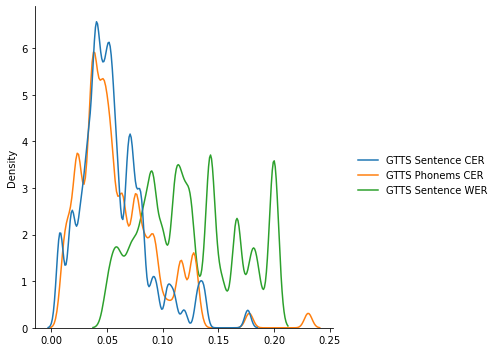

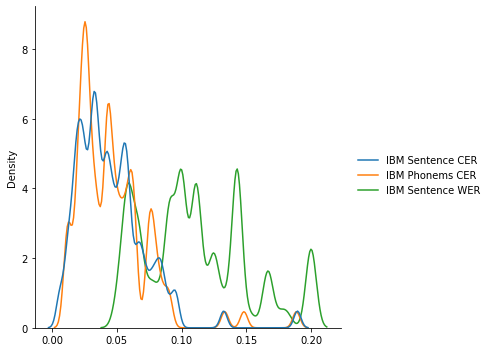

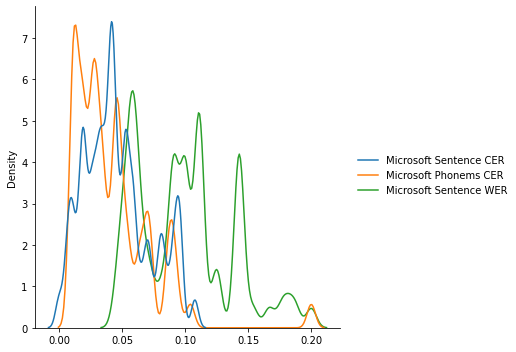

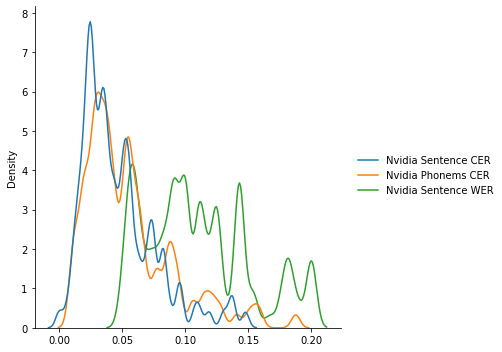

In [ ]:
#fig.suptitle('1 row x 2 columns axes with no data')
sns.displot(data=gtts_toplot, kind="kde", bw_adjust=.25);
sns.displot(data=ibm_toplot, kind="kde", bw_adjust=.25);
sns.displot(data=microsoft_toplot, kind="kde", bw_adjust=.25);
sns.displot(data=nvidia_toplot, kind="kde", bw_adjust=.25);

##Error Words Recurrence

In [ ]:
def plot_words(new_dictionary, error_dictionary, name):
  ratio=[]
  for i,item in enumerate(new_dictionary):
    ratio.append(error_dictionary[i][1].astype(float)/item[1].astype(float))
  
  ratio=np.asarray(ratio)

  new_bins=range(0,new_dictionary.shape[0])
 
  y_label=[]
  for i in range(0,36,5):
    y_label.append(str(i)+"%")

  plt.rcParams["figure.figsize"] = (15,5)
  plt.title(name+": Error frequency for the Most Frequent Words")
  plt.bar(new_bins, error_dictionary[:,1].astype(int), align='center', alpha=0.5, color="blue")
  plt.xticks(new_bins, error_dictionary[:,0],rotation='vertical')
  plt.show()
  
  plt.rcParams["figure.figsize"] = (15,5)
  plt.title(name+": Comparing total amound of Most Frequent Words to the amount of error")
  plt.bar(new_bins, error_dictionary[:,1].astype(int), align='center', alpha=0.5, color="blue")
  plt.bar(new_bins, new_dictionary[:,1].astype(int), align='center', alpha=0.5, color="red")
  plt.xticks(new_bins, error_dictionary[:,0],rotation='vertical')
  plt.show()

  plt.rcParams["figure.figsize"] = (15,5)
  plt.title(name+": Error Ratio for Most Frequent Words")
  plt.bar(new_bins, ratio*100, align='center', alpha=0.5, color="Green")
  plt.xticks(new_bins, error_dictionary[:,0],rotation='vertical')
  plt.yticks(range(0,36,5),label=(y_label))
  plt.show()

  return ratio

In [ ]:
def all_ratio_table(words_list_and_frequences, dict_ratios):
  column_names=['Methods']
  rows=[]
  firstRow = ["word count"]
  for word in words_list_and_frequences:
    column_names.append(word[0])
    firstRow.append(word[1])
  rows.append(firstRow)

  for method in dict_ratios.keys():
    row=[method]
    for ratio in dict_ratios[method]:
      row.append(round(ratio,3))
    rows.append(row)

  data = pd.DataFrame(rows, columns=column_names)  
  return data

###Plots

In [ ]:
dataset_sentences=gtts_WER[:,1] 
minimum_word_freq = 25

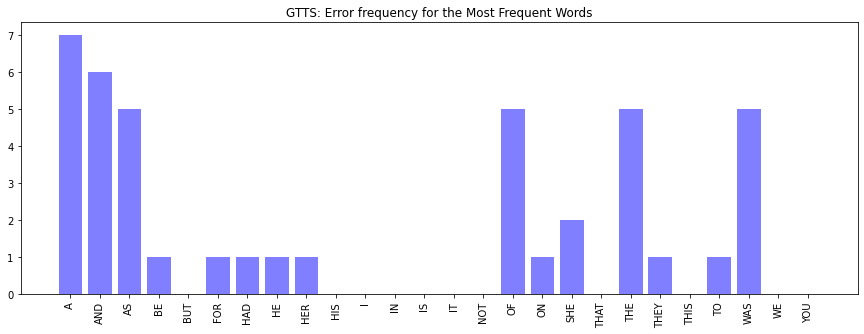

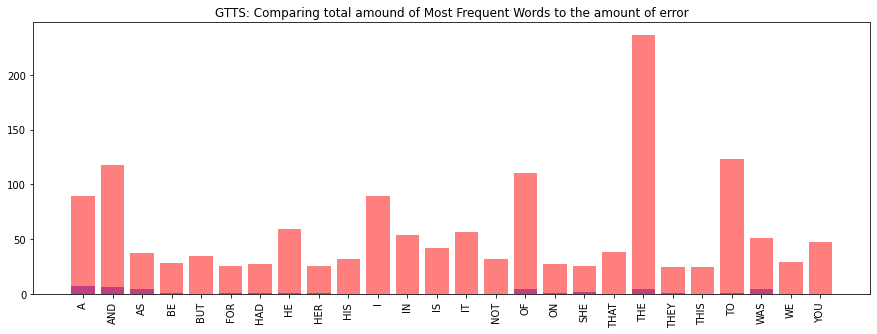

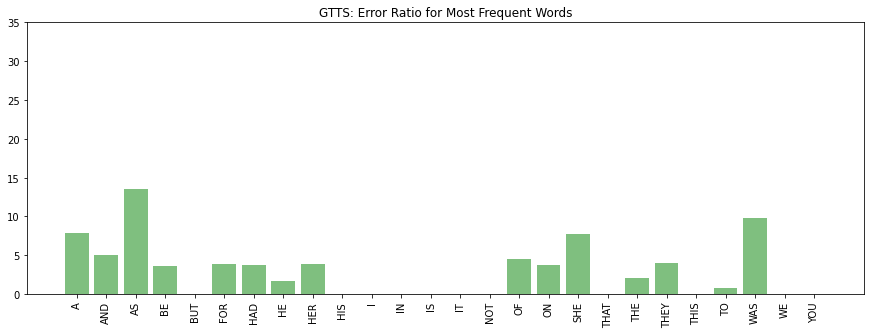

In [ ]:
frequent_words_list, gtts_short_wrong_words_list=dictionary_with_errors(dataset_sentences, gtts_wrong_words_list, min_freq=minimum_word_freq)

# 1: What is gtts_dict ?? Seems to be a list of words, it's an output from another function I didn't understand so I stopped trying to understand 
# 2: you're not using gtts_wer but gtts_WER[:,1] which is a list of sentence.. originals or transcribed from gtts+stt... best thing is:
# create a variable like: list_sentences_from_gtts = gtts_WER[:,1], and then input this variable in the function. It's more explicit (ok that's not the most important thing but for the spirit)

words_ratio_gtts=plot_words(frequent_words_list, gtts_short_wrong_words_list, "GTTS")

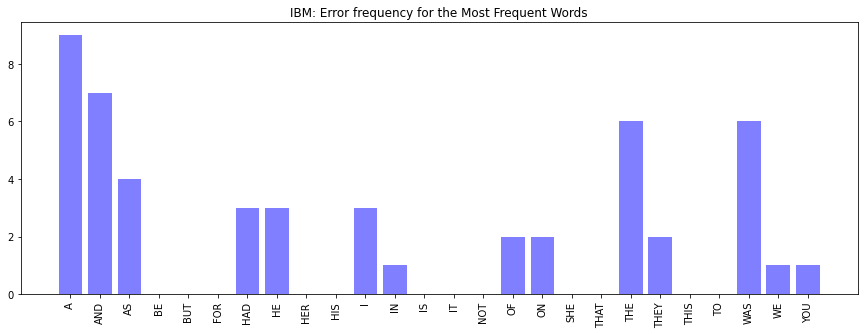

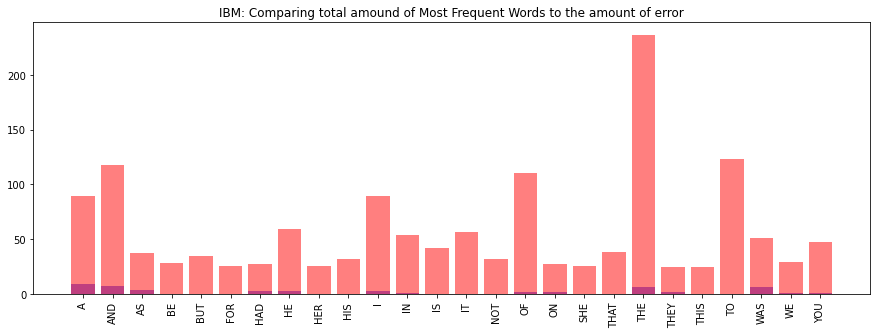

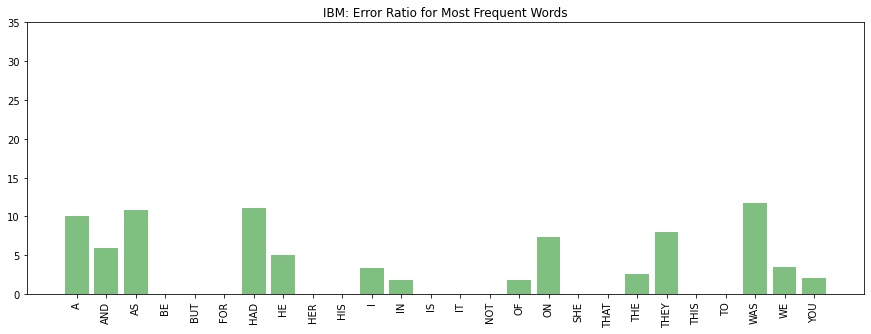

In [ ]:
_, ibm_short_wrong_words_list=dictionary_with_errors(dataset_sentences, ibm_wrong_words_list, min_freq=minimum_word_freq)

words_ratio_ibm=plot_words(frequent_words_list, ibm_short_wrong_words_list, "IBM")

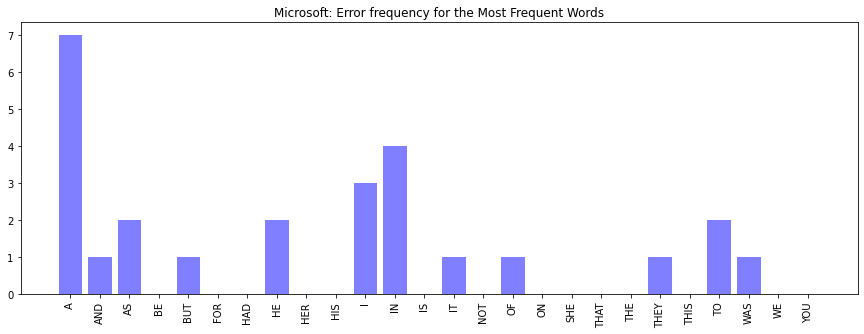

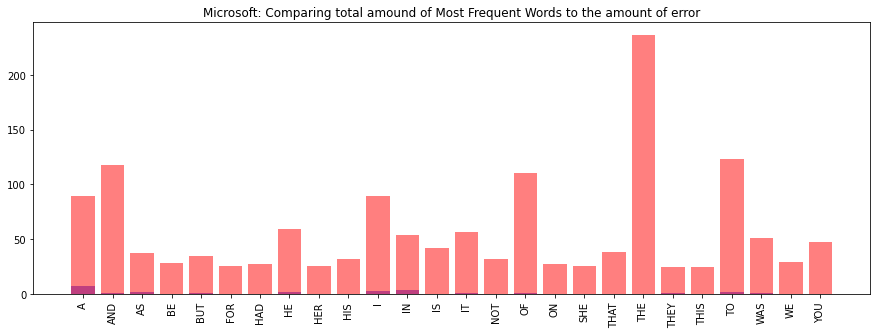

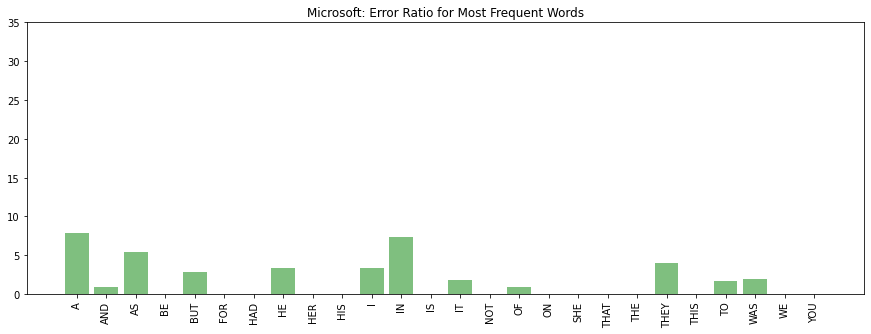

In [ ]:
_, microsoft_short_wrong_words_list=dictionary_with_errors(dataset_sentences, microsoft_wrong_words_list, min_freq=minimum_word_freq)

words_ratio_microsoft=plot_words(frequent_words_list, microsoft_short_wrong_words_list, "Microsoft")

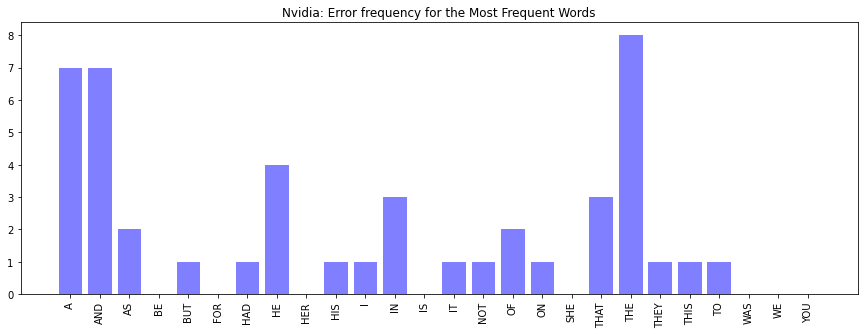

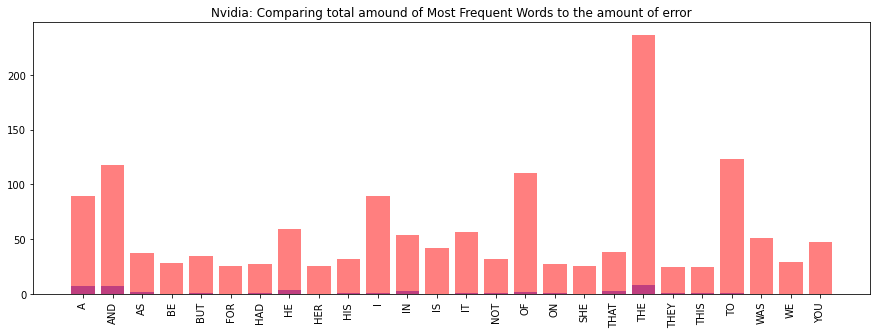

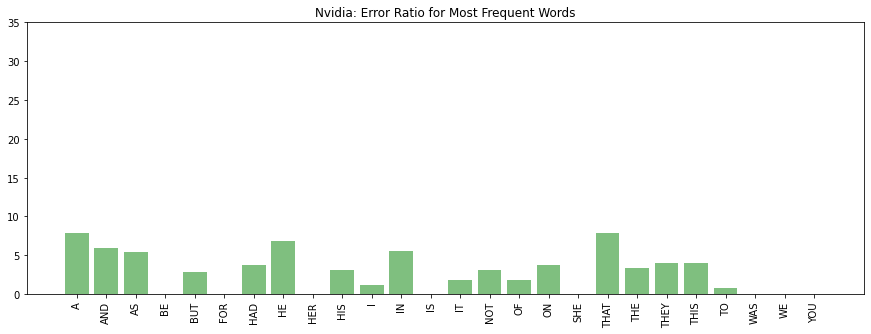

In [ ]:
_, nvidia_short_wrong_words_list=dictionary_with_errors(dataset_sentences, nvidia_wrong_words_list, min_freq=minimum_word_freq)

words_ratio_nvidia=plot_words(frequent_words_list, nvidia_short_wrong_words_list, "Nvidia")

In [ ]:
dict_ratios = {'GTTS': words_ratio_gtts, 'IBM':words_ratio_ibm, 'Microsoft':words_ratio_microsoft, 'Nvidia':words_ratio_nvidia}
data=all_ratio_table(frequent_words_list, dict_ratios)

In [ ]:
data

,Methods,A,AND,AS,BE,BUT,FOR,HAD,HE,HER,HIS,I,IN,IS,IT,NOT,OF,ON,SHE,THAT,THE,THEY,THIS,TO,WAS,WE,YOU
0,word count,89,118,37,28,35,26,27,59,26,32,89,54,42,57,32,110,27,26,38,236,25,25,123,51,29,47
1,GTTS,0.079,0.051,0.135,0.036,0,0.038,0.037,0.017,0.038,0,0,0,0,0,0,0.045,0.037,0.077,0,0.021,0.04,0,0.008,0.098,0,0
2,IBM,0.101,0.059,0.108,0,0,0,0.111,0.051,0,0,0.034,0.019,0,0,0,0.018,0.074,0,0,0.025,0.08,0,0,0.118,0.034,0.021
3,Microsoft,0.079,0.008,0.054,0,0.029,0,0,0.034,0,0,0.034,0.074,0,0.018,0,0.009,0,0,0,0,0.04,0,0.016,0.02,0,0
4,Nvidia,0.079,0.059,0.054,0,0.029,0,0.037,0.068,0,0.031,0.011,0.056,0,0.018,0.031,0.018,0.037,0,0.079,0.034,0.04,0.04,0.008,0,0,0


In [ ]:
data.to_csv('/content/table_ratio.csv', index = False)